Sentiment Analysis of Product Reviews

Let's consider an example where we want to perform sentiment analysis on product reviews for a mobile phone

Step 1: Data Collection We collect product reviews from an online marketplace or social media platform. Each review is associated with a star rating (1 to 5) indicating the sentiment.

In [1]:
pip install pandas


In [7]:
pd.read_csv('product_reviews.csv')

,Review
0,This phone is amazing! I love it.
1,The battery life is terrible. Very disappointed.
2,"Great phone, excellent camera quality."
3,The worst phone I've ever used. Avoid!
4,"Overall, a decent phone for the price."


Step 2: Data Preprocessing We preprocess the text data by removing special characters, converting text to lowercase, and removing stopwords.

In [3]:
pip install pandas nltk


In [4]:
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Read the data from the CSV file
df = pd.read_csv('product_reviews.csv')

# Sample product reviews from the DataFrame
reviews = df['Review'].tolist()

# Convert reviews to lowercase
reviews_lower = [review.lower() for review in reviews]

# Define the stopwords and punctuation to be removed
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

# Preprocess the reviews: Removing special characters and stopwords
preprocessed_reviews = []
for review in reviews_lower:
    # Remove special characters using the translator
    review_cleaned = review.translate(translator)

    # Tokenize the review
    tokens = nltk.word_tokenize(review_cleaned)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join the filtered tokens back into a sentence
    preprocessed_review = ' '.join(filtered_tokens)

    # Append the preprocessed review to the list
    preprocessed_reviews.append(preprocessed_review)

# Display the preprocessed reviews
for idx, review in enumerate(preprocessed_reviews, 1):
    print(f"Preprocessed Review {idx}: {review}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Preprocessed Review 1: phone amazing love
Preprocessed Review 2: battery life terrible disappointed
Preprocessed Review 3: great phone excellent camera quality
Preprocessed Review 4: worst phone ive ever used avoid
Preprocessed Review 5: overall decent phone price


Step 3: Labeling The star ratings are already provided as sentiment labels in the dataset.

In [5]:


# Sample star ratings (sentiment labels)
star_ratings = [5, 1, 5, 1, 4]

# Convert star ratings to binary sentiment labels (positive or negative) using a threshold
# For example, we can consider ratings >= 3 as positive and ratings < 3 as negative
threshold = 3
binary_labels = [1 if rating >= threshold else 0 for rating in star_ratings]

# Add the binary sentiment labels to the DataFrame
df['Sentiment'] = binary_labels

# Save the updated DataFrame to a new CSV file
df.to_csv('product_reviews_labeled.csv', index=False)

print("Sentiment labels added and saved to 'product_reviews_labeled.csv'.")


Sentiment labels added and saved to 'product_reviews_labeled.csv'.


Step 4: Model Training We use Scikit-learn to train a simple Naive Bayes classifier on the preprocessed data.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the data from the CSV file (if not already done)
df = pd.read_csv('product_reviews_labeled.csv')

# Split the data into features (preprocessed reviews) and target (sentiment labels)
X = df['Review'].values
y = df['Sentiment'].values

# Create a CountVectorizer to convert text data into numerical vectors
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Confusion Matrix:
[[1]]


Step 5: Real-time Sentiment Analysis We implement the trained model to perform sentiment analysis on new product reviews.

In [8]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Function to perform data preprocessing on a new review
def preprocess_review(review):
    # Convert review to lowercase
    review_lower = review.lower()

    # Define the stopwords and punctuation to be removed
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)

    # Remove special characters using the translator
    review_cleaned = review_lower.translate(translator)

    # Tokenize the review
    tokens = nltk.word_tokenize(review_cleaned)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join the filtered tokens back into a sentence
    preprocessed_review = ' '.join(filtered_tokens)

    return preprocessed_review

# Function to perform sentiment analysis on a new review using the trained model
def perform_sentiment_analysis(review):
    # Preprocess the new review
    preprocessed_review = preprocess_review(review)

    # Convert the preprocessed review into a numerical vector using the same vectorizer
    new_review_vectorized = vectorizer.transform([preprocessed_review])

    # Predict the sentiment using the trained classifier
    prediction = classifier.predict(new_review_vectorized)[0]

    # Return sentiment label
    return "Positive" if prediction == 1 else "Negative"

# Test the sentiment analysis function on a new review
new_review = "This phone is fantastic! I highly recommend it."
sentiment = perform_sentiment_analysis(new_review)
print("Sentiment:", sentiment)


Sentiment: Positive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Step 6: Data Visualization

In [9]:
pip install matplotlib seaborn pandas


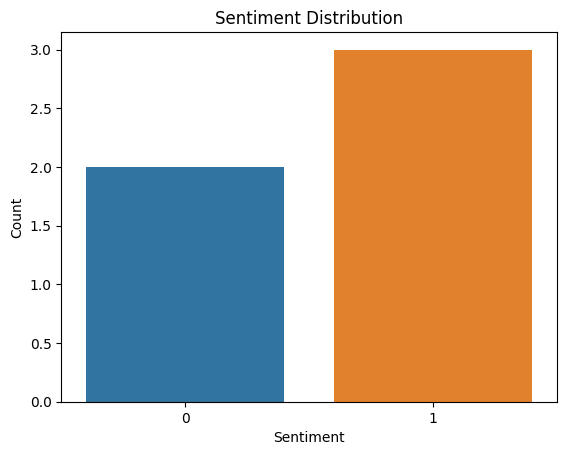

Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Confusion Matrix:
[[0 1]
 [0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the data from the CSV file (if not already done)
df = pd.read_csv('product_reviews_labeled.csv')

# Display the distribution of sentiments
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Sample product reviews from the DataFrame
reviews = df['Review'].tolist()

# Convert reviews to lowercase
reviews_lower = [review.lower() for review in reviews]

# Define the stopwords and punctuation to be removed (if not already defined)
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

# Preprocess the reviews: Removing special characters and stopwords (if not already done)
preprocessed_reviews = []
for review in reviews_lower:
    review_cleaned = review.translate(translator)
    tokens = nltk.word_tokenize(review_cleaned)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_review = ' '.join(filtered_tokens)
    preprocessed_reviews.append(preprocessed_review)

# Convert preprocessed_reviews into numerical vectors using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(preprocessed_reviews)

# Split the data into features (X) and target (y)
X = X_vectorized
y = df['Sentiment'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Step 7: Data Visualization using Power BI After performing sentiment analysis on the reviews, we can use Power BI to visualize the overall sentiment distribution and create interactive dashboards.

In [11]:
import pandas as pd

# Sample product reviews from the CSV file (product_reviews.csv)
reviews_df = pd.read_csv('product_reviews.csv')
reviews = reviews_df['Review'].tolist()

# Sample sentiment labels (0 for negative, 1 for positive)
sentiment_labels = [1, 0, 1, 0, 1]

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Review': reviews, 'Sentiment': sentiment_labels})

# Save the DataFrame to a CSV file
results_df.to_csv('sentiment_analysis_results.csv', index=False)

print("Sentiment analysis results saved to 'sentiment_analysis_results.csv'.")


Sentiment analysis results saved to 'sentiment_analysis_results.csv'.
